<a href="https://colab.research.google.com/github/onotoli/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Асимптотическая сложность**

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Поиск

# Начнём с линейного поиска

In [ ]:
lin_data = pd.read_csv("lineary_data.csv", delimiter=";", names=['N', 'lineary_Search'])

lin_data

In [20]:
def line(x, a, b):
    return a*x+b

popt, useless = curve_fit(line, lin_data["N"].tolist(), lin_data["lineary_Search"].tolist())

a, b = popt

y = line(lin_data['N'], a, b)

Text(0, 0.5, 'Время обработки')

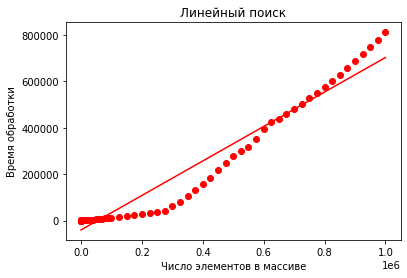

In [21]:
a = plt.subplot()
a.scatter(lin_data["N"], lin_data["lineary_Search"], label='high income low saving', color=(1, 0 , 0))
a.plot(lin_data['N'], y, color=(1, 0 , 0))
plt.title("Линейный поиск")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Как видно из графика, t(N) зависит линейно, но в некоторый момент происходит излом. Это связано с тем, что в некоторый момент программа не модет реализовывать метод, требующий мало памяти и мало времени. В этот момент программа начинает брать больше памяти, но и тратить больше времени.

# Теперь проверим асимптотику бинарного поиска

In [ ]:
bin_data = pd.read_csv("binary_data.csv", delimiter=";", names=['N', 'binary_Search'])

bin_data

In [26]:
def logarifm(x, a, b, c):
    return a*np.log(b+x)+c

popt, useless = curve_fit(logarifm, bin_data["N"].tolist(), bin_data["binary_Search"].tolist())

a, b, c = popt

y = logarifm(bin_data['N'], a, b, c)

<ipython-input-26-366e193ba9ba>:2: RuntimeWarning: invalid value encountered in log
  return a*np.log(b+x)+c


Text(0, 0.5, 'Время обработки')

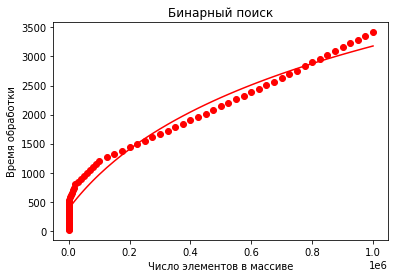

In [27]:
fig, ax = plt.subplots()
ax.scatter(bin_data["N"], bin_data["binary_Search"], color=(1, 0, 0))
ax.plot(bin_data['N'], y, color=(1, 0, 0))

plt.title("Бинарный поиск")
ax.set_xlabel("Число элементов в массиве")
ax.set_ylabel("Время обработки")

При малых N зависимость очень похожа на логарифм. Потом она больше похожа на прямую. Возжно, это связано с тем, что в окрестности единицы логарифм приближается прямой.

# Сумма двух

# Полный перебор

In [ ]:
sum_data = pd.read_csv("sum_data.csv", delimiter=";", names=['N', 'sum_Search'])

sum_data

Text(0, 0.5, 'Время обработки')

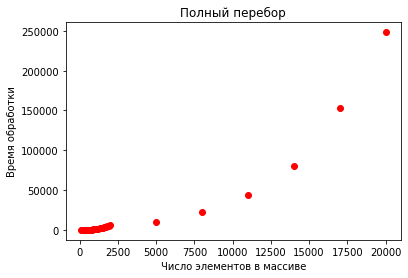

In [8]:
a = plt.subplot()
a.scatter(sum_data['N'], sum_data['sum_Search'], color=(1, 0 , 0))
plt.title("Полный перебор")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Полученный график позволяет утверждать, что алгоритм имеет квадратичную асимптотику

# Бинарный поиск

In [ ]:
binsum_data = pd.read_csv("binsum_data.csv", delimiter=";", names=['N', 'binsum_Search'])

binsum_data

Text(0, 0.5, 'Время обработки')

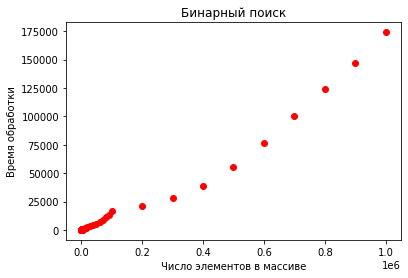

In [12]:
a = plt.subplot()
a.scatter(binsum_data['N'], binsum_data['binsum_Search'], color=(1, 0 , 0))
plt.title("Бинарный поиск")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

При N > 400 000 t(N) зависит линейно, что подтверждает линейность асимптотики.

# Часто используемый элемент

 # Стратегия А

Построим асимптотику в случае равномерного распределения искомого элемента массива

In [ ]:
A_rand = pd.read_csv("A_rand.csv", delimiter=";", names=['N', 'A_rand'])

A_rand

Text(0, 0.5, 'Время обработки')

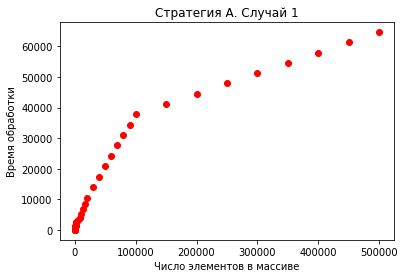

In [4]:
a = plt.subplot()
a.scatter(A_rand['N'], A_rand['A_rand'], color=(1, 0 , 0))
plt.title("Стратегия А. Случай 1")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика линейная

Теперь рассмотрим случай, когда каждую вторую итеррацию алгоритм ищет элемент, стоящий на расстоянии от начала исходного массива, равном одной трети длины массива, каждый третий -- на расстояниий, равном одной седьмой длины массива, каждый четвёртый -- на расстояниий, равном одной пятой длины массива, каждый пятый -- на расстояниий, равном одной четвёртой длины массива.

In [ ]:
A_det = pd.read_csv("A_det.csv", delimiter=";", names=['N', 'A_det'])

A_det

Text(0, 0.5, 'Время обработки')

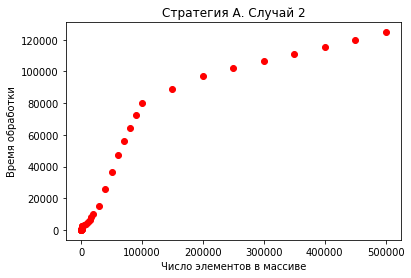

In [21]:
a = plt.subplot()
a.scatter(A_det['N'], A_det['A_det'], color=(1, 0 , 0))
plt.title("Стратегия А. Случай 2")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика тоже линейная, но в данном случае код исполняется медленнее, чем в первом, что страннно)

# Стратегия B

Равномерный случай

In [ ]:
B_rand = pd.read_csv("B_rand.csv", delimiter=";", names=['N', 'B_rand'])

B_rand

Text(0, 0.5, 'Время обработки')

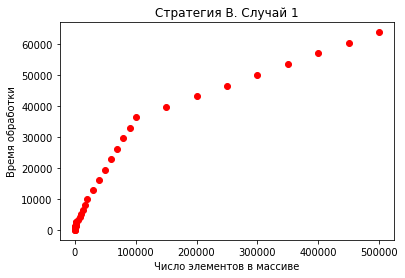

In [19]:
a = plt.subplot()
a.scatter(B_rand['N'], B_rand['B_rand'], color=(1, 0 , 0))
plt.title("Стратегия B. Случай 1")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика линейная

Теперь рассмотрим случай, когда каждую вторую итеррацию алгоритм ищет элемент, стоящий на расстоянии от начала исходного массива, равном одной трети длины массива, каждый третий -- на расстояниий, равном одной седьмой длины массива, каждый четвёртый -- на расстояниий, равном одной пятой длины массива, каждый пятый -- на расстояниий, равном одной четвёртой длины массива.

In [ ]:
B_det = pd.read_csv("B_det.csv", delimiter=";", names=['N', 'B_det'])

B_det

Text(0, 0.5, 'Время обработки')

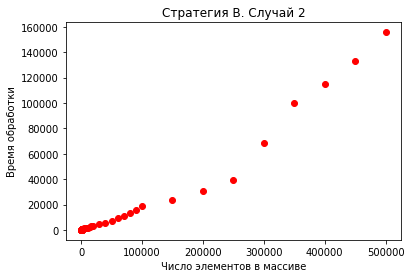

In [9]:
a = plt.subplot()
a.scatter(B_det['N'], B_det['B_det'], color=(1, 0 , 0))
plt.title("Стратегия B. Случай 2")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика линейная, но этот случай медленнее, чем равномерный

# Стратегия C

Равномерный случай

In [ ]:
C_rand = pd.read_csv("C_rand.csv", delimiter=";", names=['N', 'C_rand'])

C_rand

Text(0, 0.5, 'Время обработки')

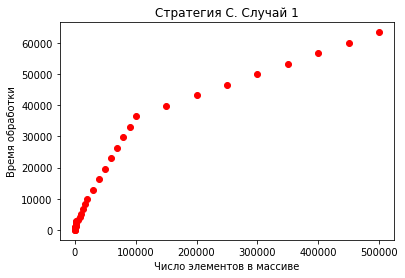

In [18]:
a = plt.subplot()
a.scatter(C_rand['N'], C_rand['C_rand'], color=(1, 0 , 0))
plt.title("Стратегия С. Случай 1")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Теперь рассмотрим случай, когда каждую вторую итеррацию алгоритм ищет элемент, стоящий на расстоянии от начала исходного массива, равном одной трети длины массива, каждый третий -- на расстояниий, равном одной седьмой длины массива, каждый четвёртый -- на расстояниий, равном одной пятой длины массива, каждый пятый -- на расстояниий, равном одной четвёртой длины массива.

In [ ]:
C_det = pd.read_csv("C_det.csv", delimiter=";", names=['N', 'C_det'])

C_det

Text(0, 0.5, 'Время обработки')

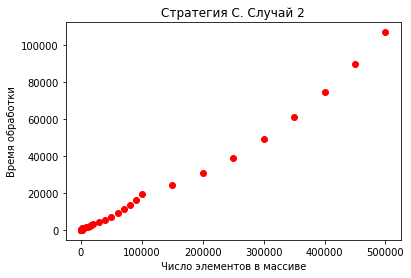

In [11]:
a = plt.subplot()
a.scatter(C_det['N'], C_det['C_det'], color=(1, 0 , 0))
plt.title("Стратегия C. Случай 2")
a.set_xlabel("Число элементов в массиве")
a.set_ylabel("Время обработки")

Асимптотика линейная, но этот случай медленнее, чем равномерный

# Вывод

Каждая стратегия в каждом случае имеет линейную асимптотику. В равномерном случае все стратегии работают с одинаковой скоростью. В неравномерном случае самой быстрой является стартегия C, на втором месте по скорости стоит стратегия A, стратегия B -- самая медленная.
Каждая стратегия работает быстрее в равномерном случае, чем в неравномерном.